<a href="https://colab.research.google.com/github/techsidh/SENTIMENT-ANALYSIS-OF-ZOMATO-RESTAURANT-/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/try/Zomato Restaurant reviews.csv")
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [5]:

df['Day'] = df['Time'].dt.day
df['Date'] = df['Time'].dt.date
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year
df['Time'] = df['Time'].dt.time

In [6]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Date,Month,Year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",15:54:00,0,25.0,2019-05-25,5.0,2019.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",14:20:00,0,25.0,2019-05-25,5.0,2019.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",22:54:00,0,24.0,2019-05-24,5.0,2019.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",22:11:00,0,24.0,2019-05-24,5.0,2019.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",21:37:00,0,24.0,2019-05-24,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",00:08:00,0,5.0,2016-06-05,6.0,2016.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",22:01:00,0,4.0,2016-06-04,6.0,2016.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",10:37:00,3,3.0,2016-06-03,6.0,2016.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",17:22:00,0,31.0,2016-05-31,5.0,2016.0


In [7]:
df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
Day           38
Date          38
Month         38
Year          38
dtype: int64

In [8]:
check_null1 = pd.DataFrame({"No of data":df.shape[0],"Null values":df.isnull().sum(),"Null values in %":round((df.isnull().sum()/df.shape[0])*100,2)})
check_null1

,No of data,Null values,Null values in %
Restaurant,10000,0,0.00
Reviewer,10000,38,0.38
Review,10000,45,0.45
Rating,10000,38,0.38
Metadata,10000,38,0.38
Time,10000,38,0.38
Pictures,10000,0,0.00
Day,10000,38,0.38
Date,10000,38,0.38
Month,10000,38,0.38


In [9]:
df.dropna(inplace = True)

drop null value and clean dataset

Review Rating rate as per year.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


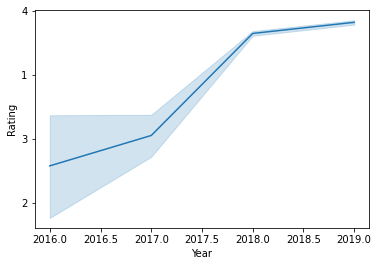

In [10]:
sns.lineplot(df['Year'],df['Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


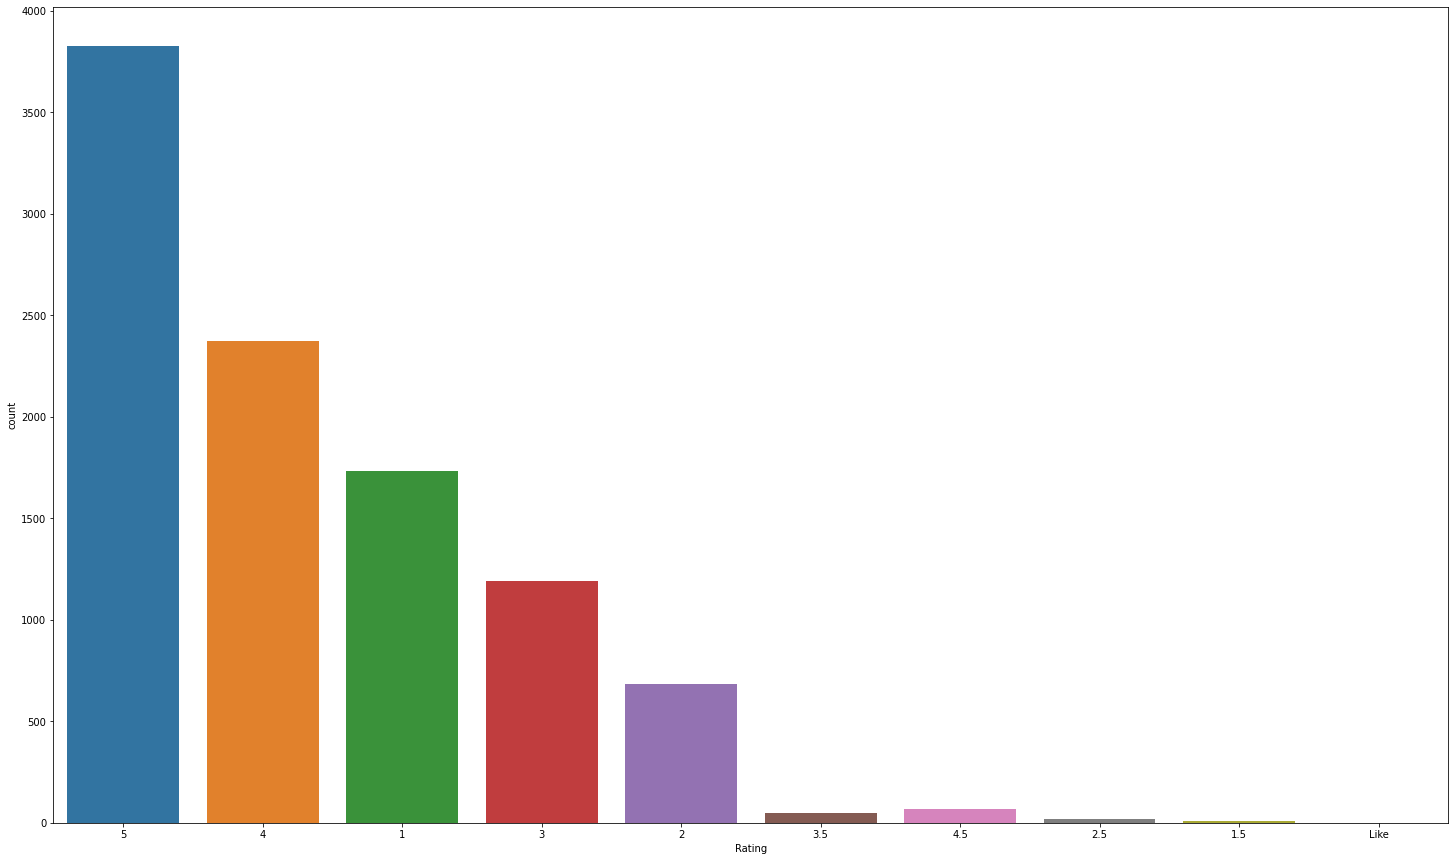

In [11]:
plt.figure(figsize = (25,15))
sns.countplot(df['Rating'])

In [12]:
df['Rating'] = df['Rating'].replace('Like',5).astype(float)


we change string to float

In [13]:
df['Rating'] = np.where(df['Rating'] < 4,0,1)

here,0 Indicate BAD rating and 1 Indicates Good rating 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


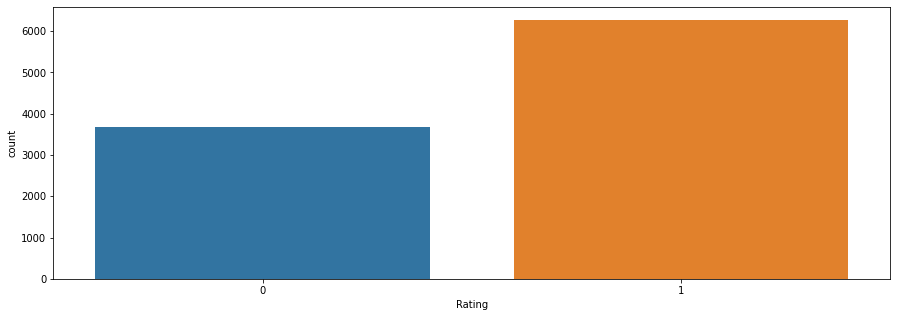

In [14]:
plt.figure(figsize = (15,5))
sns.countplot(df['Rating'])

In [15]:
import string
def rem_punch(text):
  clean = str.maketrans('','',string.punctuation)
  return text.translate(clean)

df['Review'] = df['Review'].apply(rem_punch)

In [16]:
def rem_stopword(text):
  clean = str

In [17]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def self_stopword(text):
  text1 = [i.lower() for i in text.split() if i.lower() not in stopwords.words('english')]
  return " ".join(text1)

df['Review'] = df['Review'].apply(self_stopword)

In [20]:
from nltk.corpus.reader import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
lemmo = WordNetLemmatizer()
def lemmi(sentence):
  input_str=word_tokenize(sentence)
  lemmatized_output = ' '.join([lemmo.lemmatize(w) for w in input_str])
  return lemmatized_output
df['Review'] = df['Review'].apply(lemmi)

In [22]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Date,Month,Year
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,1,"1 Review , 2 Followers",15:54:00,0,25.0,2019-05-25,5.0,2019.0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,1,"3 Reviews , 2 Followers",14:20:00,0,25.0,2019-05-25,5.0,2019.0
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,1,"2 Reviews , 3 Followers",22:54:00,0,24.0,2019-05-24,5.0,2019.0
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincerety go...,1,"1 Review , 1 Follower",22:11:00,0,24.0,2019-05-24,5.0,2019.0
4,Beyond Flavours,Dileep,food goodwe ordered kodi drumstick basket mutt...,1,"3 Reviews , 2 Followers",21:37:00,0,24.0,2019-05-24,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well start nice courteous s...,0,"53 Reviews , 54 Followers",00:08:00,0,5.0,2016-06-05,6.0,2016.0
9996,Chinese Pavilion,Sharad Agrawal,place never disappointed u food courteous staf...,1,"2 Reviews , 53 Followers",22:01:00,0,4.0,2016-06-04,6.0,2016.0
9997,Chinese Pavilion,Ramandeep,bad rating mainly chicken bone found veg food ...,0,"65 Reviews , 423 Followers",10:37:00,3,3.0,2016-06-03,6.0,2016.0
9998,Chinese Pavilion,Nayana Shanbhag,personally love prefer chinese food couple tim...,1,"13 Reviews , 144 Followers",17:22:00,0,31.0,2016-05-31,5.0,2016.0


In [23]:
X = df.drop('Rating',axis = 1)
y = df['Rating']

In [24]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 100)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
count = CountVectorizer(analyzer = 'word',token_pattern = r'\w{1,}')
x_train_count = count.fit_transform(x_train)
x_test_count  = count.transform(x_test)
count.vocabulary_

{'restaurant': 5,
 'reviewer': 7,
 'review': 6,
 'metadata': 2,
 'time': 8,
 'pictures': 4,
 'day': 1,
 'date': 0,
 'month': 3,
 'year': 9}

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train,y_train)
x_test_tfidf = tfidf.transform(x_test)
tfidf.vocabulary_

{'restaurant': 5,
 'reviewer': 7,
 'review': 6,
 'metadata': 2,
 'time': 8,
 'pictures': 4,
 'day': 1,
 'date': 0,
 'month': 3,
 'year': 9}

In [63]:
tfidf_ngram = TfidfVectorizer(analyzer = 'word',token_pattern=r'\w{1,}',ngram_range=(1,2),max_features = 5000)
x_train_tfidf_ngram = tfidf_ngram.fit_transform(x_train,y_train)
x_test_tfidf_ngram = tfidf_ngram.transform(x_test)
tfidf_ngram.vocabulary_

{'restaurant': 5,
 'reviewer': 7,
 'review': 6,
 'metadata': 2,
 'time': 8,
 'pictures': 4,
 'day': 1,
 'date': 0,
 'month': 3,
 'year': 9}

In [60]:
tfidf_ngram = TfidfVectorizer(analyzer = 'char',token_pattern=r'\w{1,}',ngram_range=(2,3),max_features = 5000)
x_train_tfidf_ngram = tfidf_ngram.fit_transform(x_train,y_train)
x_test_tfidf_ngram = tfidf_ngram.transform(x_test)
tfidf_ngram.vocabulary_

{'re': 45,
 'es': 19,
 'st': 48,
 'ta': 50,
 'au': 8,
 'ur': 59,
 'ra': 43,
 'an': 2,
 'nt': 37,
 'res': 46,
 'est': 20,
 'sta': 49,
 'tau': 52,
 'aur': 9,
 'ura': 60,
 'ran': 44,
 'ant': 3,
 'ev': 23,
 'vi': 62,
 'ie': 29,
 'ew': 25,
 'we': 64,
 'er': 18,
 'rev': 47,
 'evi': 24,
 'vie': 63,
 'iew': 30,
 'ewe': 26,
 'wer': 65,
 'me': 33,
 'et': 21,
 'ad': 0,
 'da': 13,
 'at': 5,
 'met': 34,
 'eta': 22,
 'tad': 51,
 'ada': 1,
 'dat': 14,
 'ata': 6,
 'ti': 55,
 'im': 31,
 'tim': 56,
 'ime': 32,
 'pi': 41,
 'ic': 27,
 'ct': 11,
 'tu': 57,
 'pic': 42,
 'ict': 28,
 'ctu': 12,
 'tur': 58,
 'ure': 61,
 'ay': 10,
 'day': 15,
 'te': 53,
 'ate': 7,
 'mo': 35,
 'on': 39,
 'th': 54,
 'mon': 36,
 'ont': 40,
 'nth': 38,
 'ye': 66,
 'ea': 16,
 'ar': 4,
 'yea': 67,
 'ear': 17}